# CSE 252B: Computer Vision II, Winter 2023 – Assignment 1
- Instructor: Ben Ochoa
- Due: Wednesday, January 18, 2023, 11:59 PM


## Prior knowledge + certification of commencement of academic activity

Beginning this past summer, in every course at UC San Diego, per the US Department of Education, we are now required to certify whether students have commenced academic activity for a class to be counted towards eligibility for Title IV federal financial aid. This certification must be completed during the first two weeks of instruction.

For CSE 252B, this requirement will be fulfilled via an ungraded prior knowledge quiz, which will assist the instructional team by providing information about your background coming into the course. In Canvas (https://canvas.ucsd.edu), go to the CSE 252B course and navigate to Quizzes. Then, click on the "First Day Survey: Prior Knowledge #FinAid"

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* All solutions must be written in this notebook.
* Math must be done in Markdown/LaTeX.
* You must show your work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. If you are uncertain about using a specific package, then please ask the instructional staff whether or not it is allowable.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

# Problem 1 (Programming): Feature detection (20 points)
Download input data from the course website. The file price_center20.JPG
contains image 1 and the file price_center21.JPG contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the $x$ and $y$ direction, respectively. Calculate the gradient images using the five-point
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
600–650 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Förstner corner point
operator.

You may use scipy.signal.convolve to perform convolution operation and scipy.ndimage.maximum_filter for NMS operation.

You may either directly use the color images for feature detection, or use the color to grayscale mapping $Y = 0.21263903 * R + 0.71516871 * G + 0.072192319 * B$ to convert the images to grayscale first.

#### Report your final values for:
 * the size of the feature detection window (i.e., the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e., corners) in each image.

#### Display figures for:
 * minor eigenvalue images before thresholding
 * minor eigenvalue images after thresholding
 * original images with detected features

A typical implementation takes around 30 seconds to run. If yours takes more than 120 seconds, you may lose points.

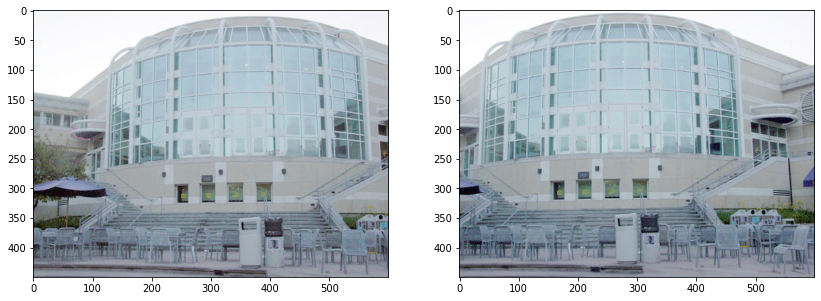

In [19]:
# %matplotlib inline
# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import time


# open the input images
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

In [20]:
from scipy import signal
from scipy import ndimage
import collections

def ImageGradient(I):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    #
    # outputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    
    m, n = I.shape[:2]
    print(m,n)
    """your code here"""
    if len(I.shape) == 3:
        I_gray = 0.2989*I[:,:,0] + 0.5870*I[:,:,1] + 0.1140*I[:,:,2]
    else:
        I_gray = I
    print(I_gray.shape)    
    Ix = np.zeros((m,n))
    
    Iy = np.zeros((m,n))
    #one dim kernel: 5-points
    gradient_kernel = 1/12*np.array([-1,8,0,-8,1]).T
    for i in range(m):
            Ix[i,:] = signal.convolve(I_gray[i,:],gradient_kernel,mode = 'same')
    for j in range(n):
            Iy[:,j] = (signal.convolve(I_gray[:,j].T,gradient_kernel,mode = 'same')).T

    print("Ix:",Ix.shape,Ix,"IY:",Iy.shape,Iy)
    return Ix, Iy
  

def MinorEigenvalueImage(Ix, Iy, w):
    # Calculate the minor eigenvalue image J
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    #
    # outputs:
    # J0 is the mxn minor eigenvalue image of N before thresholding

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0.
    """your code here"""
    
    Ixx = np.multiply(Ix,Ix)
    Iyy = np.multiply(Iy,Iy)
    Ixy = np.multiply(Ix,Iy)
    
    window = int(w//2) 
    N = np.zeros((m,n,2,2))
    temp = np.zeros((2,2))
    
    #valid case:

    for i in range(window,m-window,1):
        for j in range(window,n-window,1):
            N[i,j,0,0] = np.sum(Ixx[i-window:i+window+1, j-window:j+window+1]) 
            N[i,j,0,1] = np.sum(Ixy[i-window:i+window+1, j-window:j+window+1]) 
            N[i,j,1,0] = N[i,j,0,1]
            N[i,j,1,1] = np.sum(Iyy[i-window:i+window+1, j-window:j+window+1]) 
            temp = N[i,j, :,:]
            J0[i,j] = (np.matrix.trace(temp)) - np.sqrt(max(0,np.matrix.trace(temp)**2 - 4*np.linalg.det(temp)))/2 
    print("N",N)        
    return J0,N

 
  
  
  
  
  
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w_nms
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    J2 = J.copy()
    """your code here"""
    m,n = J.shape[:2]
    w = int(w_nms //2)
    J_R = ndimage.maximum_filter(J2, size=(w_nms,w_nms))
    # for i in range(m):
    #     for j in range(n):
    #         if J[i,j] < J_R[i,j] :  J2[i,j] = 0
    J2[J<J_R] = 0

    # J2 = [0 if J[i,j] < J_R[i,j]  for i,j in range(m)and range(n)]
    return J2,J_R
  
def ForstnerCornerDetector(Ix, Iy, w, t, w_nms):
    # Calculate the minor eigenvalue image J
    # Threshold J
    # Run non-maxima suppression on the thresholded J
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the local nonmaximum suppression window
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC array of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    # J2 is the mxn minor eigenvalue image of N after thresholding and NMS

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0 and its thresholded version J1.
    """your code here"""
    J0,N = MinorEigenvalueImage(Ix,Iy,w)
    J1 = J0.copy()
    J1[J1<t] = 0

                
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2,J_R = NMS(J1, w_nms)
    
    #Detect corners.
    """your code here"""
    #collections.Counter(a)
    C = m*n - np.count_nonzero(J2 == 0)
    Ixx = np.multiply(Ix,Ix)
    Iyy = np.multiply(Iy,Iy)
    Ixy = np.multiply(Ix,Iy)
    #linear linperpolition:
    x_a =np.zeros((m,n))
    y_a = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            x_a[i][j] = j * Ixx[i][j] + i * Ixy[i][j]
            y_a[i][j] = j * Ixy[i][j] + i * Iyy[i][j]
    
    w1 = int(w_nms//2)
    iinper = np.zeros((m,n,2))
    pts = []
    c = 0
    for i in range(w1+1,m-w1-1):
        for j in range(w1+1,n-w1 -1): 
            iinper[i,j,0] = np.sum(x_a[i-w1:i+w1+1,j-w1:j+w1+1]) 
            iinper[i,j,1] = np.sum(y_a[i-w1:i+w1+1,j-w1:j+w1+1])
            if J2[i,j] != 0:   
                try:
                    corner = np.dot(np.linalg.inv(N[i,j,:,:]),(np.array(iinper[i,j,:]).T))
                    pts.append([corner[0],corner[1]])
                    c+=1
                except Exception as exc:
                    print('Singular Matrix at', J1)
    
                    

    
    pts = np.array(pts)

    # for i in range(w1,m-w1):
    #     for j in range(w1,n-w1):
 
    #         iinper[i,j,0] = np.sum(x_a[i-w1:i+w1+1,j-w1:j+w1+1]) 
    #         iinper[i,j,1] = np.sum(y_a[i-w1:i+w1+1,j-w1:j+w1+1])
    #         corner = np.dot(np.linalg.inv(N[i,j,:,:]),list(iinper[i,j,:]))
    #         pts.append([corner[1],corner[0]])
    # pts = np.array(pts)
    
    return (c), pts.T, J0, J1, J2


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    Ix, Iy = ImageGradient(I)
    C, pts, J0, J1, J2 = ForstnerCornerDetector(Ix, Iy, w, t, w_nms)
    return C, pts, J0, J1, J2

In [21]:
# ImageGradient() unit test
def CheckValues(I, target):
    eps = 1e-8  # Floating point error threshold
    I = I[2:-2, 2:-2]  # Ignore border values
    valid = np.all((I < target + eps) & (I > target - eps))
    print(f'Image is all equal to {target} +/- {eps}: {valid}')
    
def GrayToRGB(I):
    h, w = I.shape
    I = np.expand_dims(I, axis=-1)
    return np.broadcast_to(I, (h, w, 3))

rampx = np.array(Image.open('rampx.png'), dtype='float')
rampy = np.array(Image.open('rampy.png'), dtype='float')

# If you are using grayscale images in ImageGradient(), comment out these lines 
rampx = GrayToRGB(rampx)
rampy = GrayToRGB(rampy)

# rampx_Ix should be all ones, rampx_Iy should be all zeros (to floating point error)
rampx_Ix, rampx_Iy = ImageGradient(rampx) 
CheckValues(rampx_Ix, 1)
CheckValues(rampx_Iy, 0)

# rampy_Ix should be all zeros, rampx_Iy should be all ones (to floating point error)
rampy_Ix, rampy_Iy = ImageGradient(rampy)
CheckValues(rampy_Ix, 0)
CheckValues(rampy_Iy, 1)

256 256
(256, 256)
Ix: (256, 256) [[   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]
 [   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]
 [   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]
 ...
 [   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]
 [   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]
 [   0.49995     1.083225    0.9999   ...    0.9999     22.3311
  -148.235175]] IY: (256, 256) [[ 0.00000000e+00  5.83275000e-01  1.16655000e+00 ...  1.47568575e+02
   1.48151850e+02  1.48735125e+02]
 [ 0.00000000e+00 -8.33250000e-02 -1.66650000e-01 ... -2.10812250e+01
  -2.11645500e+01 -2.12478750e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.06581410e-14
  -7.10542736e-15 -3.55271368e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.06581410e-14
  -7.10542736e-15 -3.55271368e-15]
 [ 0.00000000e+00  8.33250000e-02  1.66650000e

450 600
(450, 600)
Ix: (450, 600) [[ 5.65335556e-01 -8.07622222e-02 -2.77555756e-17 ... -1.38777878e-17
   7.93982680e-02 -5.55787876e-01]
 [ 5.65335556e-01 -8.07622222e-02 -2.77555756e-17 ... -1.38777878e-17
   7.93982680e-02 -5.55787876e-01]
 [ 5.65335556e-01 -8.07622222e-02 -2.77555756e-17 ... -1.38777878e-17
   7.93982680e-02 -5.55787876e-01]
 ...
 [ 3.37473399e-01 -3.57184314e-02  1.51712092e-02 ... -3.72382353e-03
   4.04598366e-02 -3.52136765e-01]
 [ 3.24274608e-01 -3.77862418e-02 -2.19313725e-03 ... -3.05620915e-03
   8.00579412e-02 -3.44403562e-01]
 [ 2.53039902e-01 -2.50424183e-02 -2.51990196e-03 ... -3.05620915e-03
   8.00579412e-02 -3.44403562e-01]] IY: (450, 600) [[ 5.65335556e-01  5.65335556e-01  5.65335556e-01 ...  5.55787876e-01
   5.55787876e-01  5.55787876e-01]
 [-8.07622222e-02 -8.07622222e-02 -8.07622222e-02 ... -7.97250327e-02
  -7.97250327e-02 -7.97250327e-02]
 [-2.77555756e-17 -2.77555756e-17 -2.77555756e-17 ...  2.28735294e-03
   2.28735294e-03  2.28735294e-03]


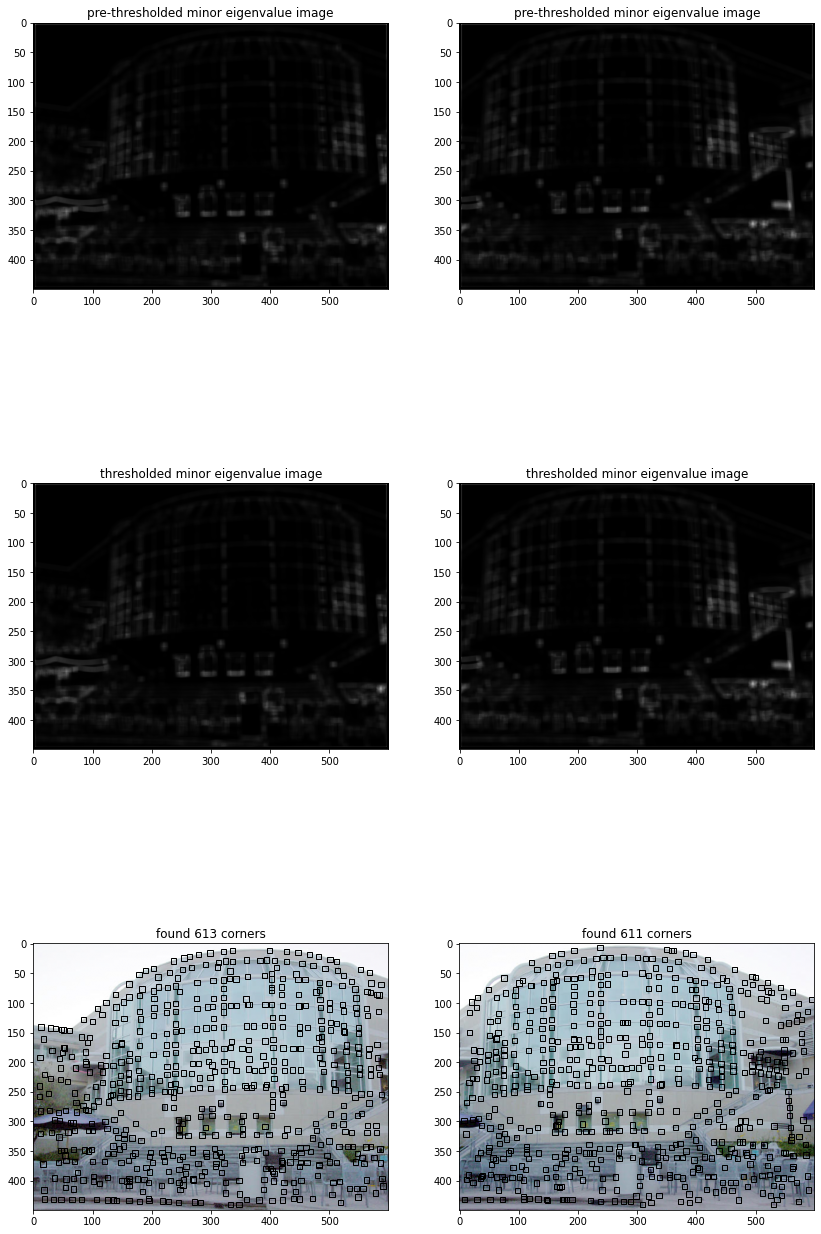

In [22]:
# input images
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

# parameters to tune
w = 9
t = 0.01
w_nms = 9

tic = time.time()
# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2, w, t, w_nms)
toc = time.time() - tic

print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show pre-thresholded minor eigenvalue images
plt.subplot(3,2,1)
plt.imshow(J1_0, cmap='gray')
plt.title('pre-thresholded minor eigenvalue image')
plt.subplot(3,2,2)
plt.imshow(J2_0, cmap='gray')
plt.title('pre-thresholded minor eigenvalue image')

# show thresholded minor eigenvalue images
plt.subplot(3,2,3)
plt.imshow(J1_1, cmap='gray')
plt.title('thresholded minor eigenvalue image')
plt.subplot(3,2,4)
plt.imshow(J2_1, cmap='gray')
plt.title('thresholded minor eigenvalue image')

# show corners on original images
ax = plt.subplot(3,2,5)
plt.imshow(I1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('found %d corners'%C1)

ax = plt.subplot(3,2,6)
plt.imshow(I2)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('found %d corners'%C2)

plt.show()

#### Final values for parameters
* w = 11
* t =0.01
* w_nms = 11
* C1 = 613
* C2 = 623

## Problem 2 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that 160-240 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

Use the following formula to calculate the correlation coefficient (normalized cross correlation) between two image windows $I_1$ and $I_2$:
$$\frac{\sum_{x, y}\left[ I_1(x, y) - \overline{I_1} \right] \left[ I_2(x, y) - \overline{I_2} \right] }{\sqrt{\sum_{x, y}\left[ I_1(x, y) - \overline{I_1} \right]^2 \cdot \sum_{x, y}\left[ I_2(x, y) - \overline{I_2} \right]^2}}$$

where $I(x, y)$ is the pixel value of $I$ at $(x, y)$ and $\overline{I}$ is the mean value of $I$.

**Note: You must center each window at the sub-pixel corner coordinates while computing normalized cross correlation, i.e., you must use bilinear interpolation to compute the pixel values at non-integer coordinates; otherwise, you will lose points.**

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e., matched features)

#### Display figures for:
* pair of images, where the matched features in each of the images are indicated by a square window about the feature. 

(You must use original (color) images to the draw boxes and correspondence lines)

A typical implementation takes around 10 seconds to run. If yours takes more than 120 seconds, you may lose points.


In [105]:
def NCC(I1, I2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #
    # Do ensure that windows are centered at the sub-pixel co-ordinates 
    #      while computing normalized cross correlation.
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    # 
    
    """your code here"""
    if len(I1.shape) == 3:
            I1= 0.2989*I1[:,:,0] + 0.5870*I1[:,:,1] + 0.1140*I1[:,:,2]

    if len(I2.shape) == 3:
            I2= 0.2989*I2[:,:,0] + 0.5870*I2[:,:,1] + 0.1140*I2[:,:,2]

    #m = 450,n = 600       
    # print(pts1.shape)
    # print(max(pts1[0][:])) 
    # print(max(pts1[1][:]))        
    m,n = I1.shape
    window = int(w//2)
    scores = np.zeros((C1,C2))
    for i in range(C1):
        for j in range(C2):
            x1 = int(pts1[:,i][0])
            y1 = int(pts1[:,i][1])
            x2 = int(pts2[:,j][0])
            y2 = int(pts2[:,j][1])
            # boundary:
            if min(x1-window,x2 - window,y1 - window, y2 - window) <0 :
                continue
            if max (m - x1,m - x2, n  - y1, n - y2) < window + 1:
                continue
            if np.sqrt((x1-x2)**2+(y1-y2)**2)>p:
                continue
            # patch window
            # p1 = I1[x1 - window: x1 + window +1, y1 - window : y1 + 1 + window]
            # p2 = I2[x2 - window: x2 + window +1, y2 - window : y2 + 1 + window]
            p1 = I1[y1 - window: y1 + window +1, x1 - window : x1 + 1 + window]
            p2 = I2[y2 - window: y2 + window +1, x2 - window : x2 + 1 + window]
            mean1 = np.mean(p1)
            sd1 = np.sum((p1 - mean1)**2)
            s1 = (p1-mean1)/np.sqrt(sd1)
            mean2 = np.mean(p2)
            sd2 = np.sum((p2 - mean2)**2)
            s2 =  (p2-mean2)/np.sqrt(sd2)
            # print(I2.shape)
            # print(x2 - window, x2 + window +1, y2 - window, y2 + 1 + window)
            # print(p2)
            # print(i,j)
            scores[i][j] = np.sum(np.multiply(s1,s2))
    print("scores: ", scores,scores.shape)
    print(C1,C2)
    np.savetxt('readme.txt',scores)

    return scores

  

def Match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # 2xM array of the feature coordinates in image 1 and image 2,
    # where M is the number of matches.
    
    """your code here"""
    inds = []

    m,n = scores.shape

    i,j = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
    
    mask = np.ones((m,n), dtype = bool)
#     print(np.amax(scores))
#     print(np.max(scores))
    max_val = np.max(scores)
    while (t < max_val):
        cor_masked = np.multiply(scores, mask)
        index = np.unravel_index(cor_masked.argmax(), cor_masked.shape)
        max_val = np.max(cor_masked)
        
        cor_masked[index] = -1
        scores[index] = -1
            
        row = index[0]
        col = index[1]
        same_row = scores[row]
        for c in cor_masked:
            same_col = [c[col]]
            
        next_max_val = max(np.max(same_row), np.max(same_col))
    
        cor_masked[index] = max_val
        scores[index] = max_val
        if (1 - max_val) < d*(1 - next_max_val):
            inds.append([int(index[0]), int(index[1])])
            mask[row,:] = 0
            mask[:,col] = 0
        else:
            mask[index] = 0
    return np.transpose(inds)



def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w, p)
    inds = Match(scores, t, d)
    print("inds", inds)
    return inds

scores:  [[ 0.9174248   0.9342578   0.95803816 ...  0.          0.
   0.        ]
 [ 0.          0.98594013  0.         ...  0.          0.
   0.        ]
 [ 0.95477715  0.94124303  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.76063859  0.
  -0.08982264]
 [ 0.          0.          0.         ...  0.73197512  0.
  -0.01557857]
 [ 0.          0.          0.         ...  0.72417584  0.33561445
  -0.06916523]] (613, 611)
613 611
0.991357876677035
0.991357876677035
inds [[ 37  34 113  73   1 164 251 217 378 350 232 178 373  86   7 573 136 263
  241 121  95 391 248 609 585  13 385 543 377 559 359  11 419 208 568 414
  292 279 530 400 132 549  70 327 418 603 242 239 490 337 520 206 580 191
  600 150   6 210 271 173 495 595 211 280 426 431 558 146 395 238 409 397
    2 141 122 315 376  19 369  81  97 589   9 437 192 380 601 235 487 286
  324 284  88  56  26 361 266 307 243 562 161  61 447 421 415 392 605  17
   77 240 293 289 582 441 344 316 5

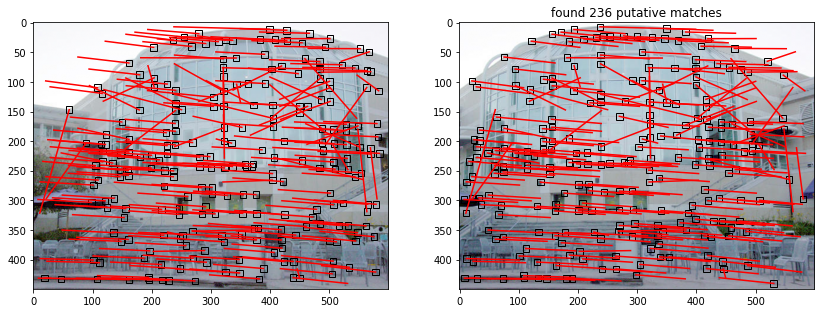

unique points in image 1: 236
unique points in image 2: 236


In [107]:
# parameters to tune
w = 11
t = 0.7
d = 0.92
p = 185 #np.inf

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
print("shape of inds: {}".format(inds.shape))
print("shape of pts: {}".format(pts1.shape))
match1 = pts1[:,inds[0,:].astype('int')]
match2 = pts2[:,inds[1,:].astype('int')]

# display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('found %d putative matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

# test 1-1
print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 11
* t = 0.7
* d = 0.93
* p = 185
* num_matches = 236